In [28]:
import os
import sys
import glob
import csv

import numpy as np
import matplotlib.pyplot as plt

In [20]:
print('CSV Paths:')
print(glob.glob('./*.csv'))

CSV Paths:
['./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-batch_IoU_Class0_Background.csv']


In [43]:
def read_tb_csv(csvfilepath: str):
    """Read a TensorBoard csv file and returns its content
        Inputs: 
            csvfilepath: csv file path
        Outputs: 
            a
            a
            a
    """
    with open(csvfilepath, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        
        # Fieldnames: ['Wall time', 'Step', 'Value']
        # print(f'fieldnames: {reader.fieldnames}')
        
        wall_time, step, value = [], [], []
        for row in reader:
            wall_time.append(float(row['Wall time']))
            step.append(int(row['Step']))
            value.append(float(row['Value']))
            
    wall_time = np.array(wall_time)
    wall_time -= wall_time[0]
    
    return wall_time, step, value

In [44]:
wall_time, step, value \
    = read_tb_csv('./run-fit_UNet_Zero_Pad_2019O-512-SCCE_train-tag-batch_IoU_Class0_Background.csv')

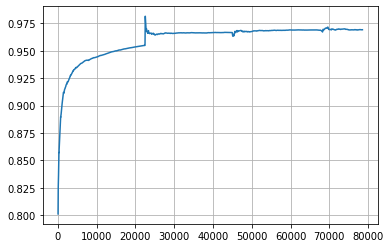

In [46]:
plt.plot(step, value)
plt.grid()